**PREDIÇÃO DA VIDA ÚTIL DE MOTORES AERONÁUTICOS (RUL)**

**Este projeto tem como objetivo desenvolver um modelo preditivo robusto para estimar a vida útil remanescente (RUL) de motores aeronáuticos, com base em sensores operacionais, configurações de voo e ciclos de operação. Utilizando algoritmos de machine learning e validação cruzada, conseguimos prever com alta precisão quantos ciclos restam até a falha de cada motor. Com os insights gerados, é possível antecipar falhas críticas, otimizar a manutenção preditiva e aumentar a segurança operacional, contribuindo diretamente para a redução de custos, melhoria da eficiência e prevenção de acidentes.**

**Sobre o Dataset:**

**Um motor (id) é monitorado em vários momentos da sua vida útil (ciclos).**

**Cada cycle é um ponto no tempo (tipo um "frame" da operação). Em cada ciclo, temos: 3 parâmetros operacionais (setting1, setting2, setting3) e 21 leituras de sensores físicos (s1 a s21).**



In [3]:
# Importando Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, GroupKFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import plotly.graph_objects as go
from plotly.subplots import make_subplots
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [4]:
# Carregando a base de dados
df = pd.read_excel('/content/PM_train.xlsx')

In [5]:
# Observando
df.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190
1,1,2,0.0019,-0.0003,100,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236
2,1,3,-0.0043,0.0003,100,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442
3,1,4,0.0007,0.0000,100,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739
4,1,5,-0.0019,-0.0002,100,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044


In [6]:
df.tail()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
20626,100,196,-0.0004,-0.0003,100,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100,38.30,23.1594
20628,100,198,0.0004,0.0000,100,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100,38.44,22.9333
20629,100,199,-0.0011,0.0003,100,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100,38.29,23.0640
20630,100,200,-0.0032,-0.0005,100,518.67,643.85,1600.38,1432.14,14.62,...,519.30,2388.26,8137.33,8.5036,0.03,396,2388,100,38.37,23.0522


In [7]:
# Informações sobre os tipos de variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        20631 non-null  int64  
 1   cycle     20631 non-null  int64  
 2   setting1  20631 non-null  float64
 3   setting2  20631 non-null  float64
 4   setting3  20631 non-null  int64  
 5   s1        20631 non-null  float64
 6   s2        20631 non-null  float64
 7   s3        20631 non-null  float64
 8   s4        20631 non-null  float64
 9   s5        20631 non-null  float64
 10  s6        20631 non-null  float64
 11  s7        20631 non-null  float64
 12  s8        20631 non-null  float64
 13  s9        20631 non-null  float64
 14  s10       20631 non-null  float64
 15  s11       20631 non-null  float64
 16  s12       20631 non-null  float64
 17  s13       20631 non-null  float64
 18  s14       20631 non-null  float64
 19  s15       20631 non-null  float64
 20  s16       20631 non-null  fl

In [8]:
# Dados estatísticos
df.describe()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [9]:
# Verificando a existência de valores nulos
df.isnull().sum()

,0
id,0
cycle,0
setting1,0
setting2,0
setting3,0
s1,0
s2,0
s3,0
s4,0
s5,0


In [10]:
# Coeficiente de variação: std / mean (ignora médias muito próximas de zero)
cv = df.std() / df.mean()

# Filtrar colunas com CV < 0.01 (baixa variabilidade relativa)
low_variability_cols = cv[cv < 0.01].index.tolist()

# Mostrar colunas
print("Colunas com baixa variabilidade (CV < 1%):")
for col in low_variability_cols:
    print(f"{col}: CV = {cv[col]:.5f}")

Colunas com baixa variabilidade (CV < 1%):
setting1: CV = -246.59270
setting3: CV = 0.00000
s1: CV = 0.00000
s2: CV = 0.00078
s3: CV = 0.00385
s4: CV = 0.00639
s5: CV = 0.00000
s6: CV = 0.00006
s7: CV = 0.00160
s8: CV = 0.00003
s9: CV = 0.00244
s10: CV = 0.00000
s11: CV = 0.00562
s12: CV = 0.00141
s13: CV = 0.00003
s14: CV = 0.00234
s15: CV = 0.00444
s16: CV = 0.00000
s17: CV = 0.00394
s18: CV = 0.00000
s19: CV = 0.00000
s20: CV = 0.00466
s21: CV = 0.00465


In [11]:
# Dropando as colunas com variabilidade 0
df.drop(columns=['setting3', 's1', 's5', 's6', 's10', 's13', 's16', 's18', 's19'], inplace=True)

Text(0.5, 1.0, 'Distribuição do ciclo final por motor')

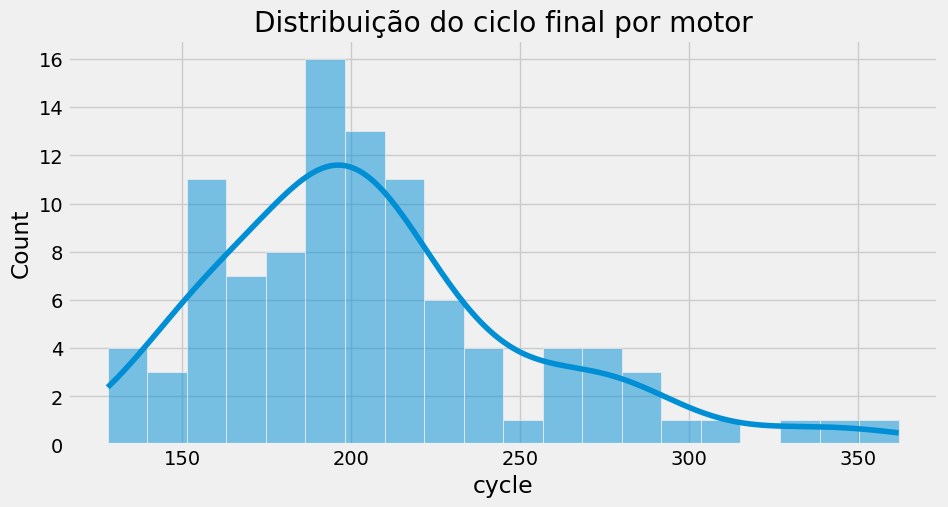

In [12]:
sns.histplot(df.groupby('id')['cycle'].max(), bins=20, kde=True)
plt.title("Distribuição do ciclo final por motor")

**O gráfico acima nos diz: Cada barra representa quantos motores chegaram até um determinado número de ciclos antes de falharem. A curva de densidade (linha azul) mostra a tendência geral de vida útil dos motores. Notamos que a maioria dos motores falham entre 180 e 220 ciclos e poucos passam dos 300 ciclos.**

**Agora vamos cria a variável alvo RUL (Remaining Useful Life), que nada mais é do que o ciclo de vida restante que um motor tem antes de falhar.**

In [13]:
# Calcular o ciclo máximo (ciclo de falha) por motor
rul_por_motor = df.groupby('id')['cycle'].max().reset_index()
rul_por_motor.columns = ['id', 'max_cycle']

In [14]:
# Juntar essa info ao dataframe original
df = df.merge(rul_por_motor, on='id', how='left')

In [15]:
# Calcular o RUL: diferença entre ciclo final e ciclo atual
df['RUL'] = df['max_cycle'] - df['cycle']

In [16]:
# Remover a coluna auxiliar 'max_cycle' se quiser
df.drop(columns='max_cycle', inplace=True)

In [17]:
# Visualizando as primeiras linhas com a nova coluna
df[['id', 'cycle', 'RUL']].head()

,id,cycle,RUL
0,1,1,191
1,1,2,190
2,1,3,189
3,1,4,188
4,1,5,187


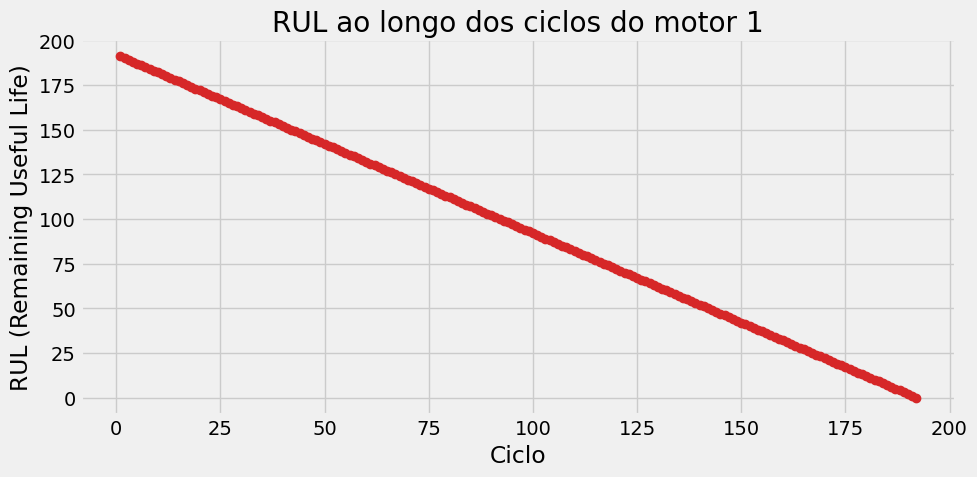

In [18]:
# Escolhendo um motor de exemplo
motor_id = 1

# Filtrar os dados desse motor
df_motor = df[df['id'] == motor_id]

# Plotar a linha de RUL ao longo do tempo
plt.figure(figsize=(10, 5))
plt.plot(df_motor['cycle'], df_motor['RUL'], marker='o', color='tab:red')
plt.title(f"RUL ao longo dos ciclos do motor {motor_id}")
plt.xlabel("Ciclo")
plt.ylabel("RUL (Remaining Useful Life)")
plt.grid(True)
plt.tight_layout()
plt.show()

**O gráfico acima nos mostra claramente uma queda linear ao longo dos ciclos.**

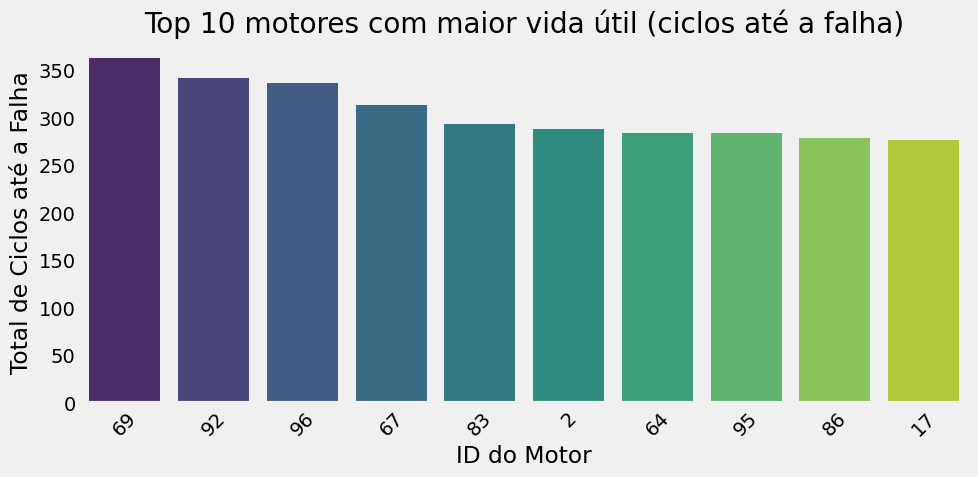

In [19]:
# Calcular o ciclo final (máximo) de cada motor
ciclos_finais = df.groupby('id')['cycle'].max()

# Selecionando os 10 motores com maior vida útil
top10_motores = ciclos_finais.sort_values(ascending=False).head(10)

# Ordenar os dados explicitamente do maior para o menor
top10_motores = top10_motores.sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=top10_motores.index.astype(str), y=top10_motores.values, palette='viridis')

plt.title("Top 10 motores com maior vida útil (ciclos até a falha)")
plt.xlabel("ID do Motor")
plt.ylabel("Total de Ciclos até a Falha")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()


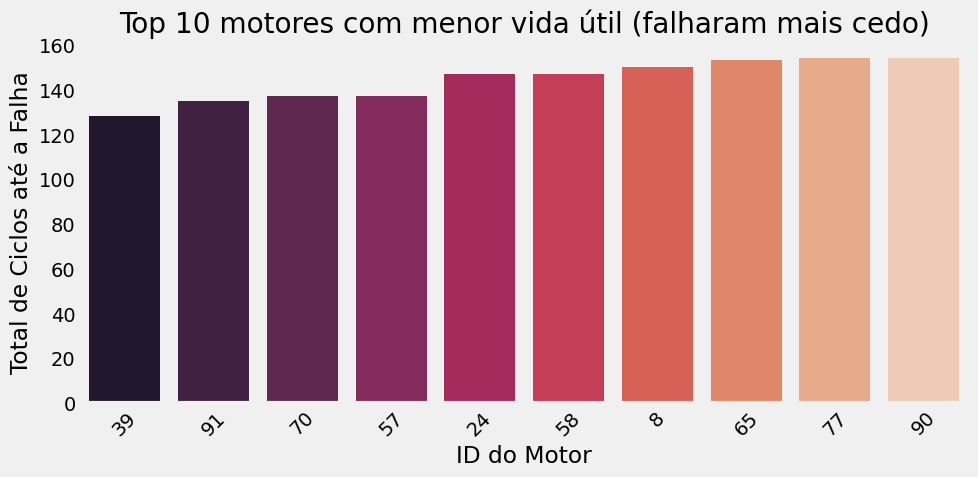

In [20]:
# Calculando o ciclo final (máximo) de cada motor
ciclos_finais = df.groupby('id')['cycle'].max()

# Selecionando os 10 motores com menor vida útil
bottom10_motores = ciclos_finais.sort_values(ascending=True).head(10)

# Ordenar explicitamente em ordem crescente para garantir visualização correta
bottom10_motores = bottom10_motores.sort_values(ascending=True)

plt.figure(figsize=(10, 5))
sns.barplot(x=bottom10_motores.index.astype(str), y=bottom10_motores.values, palette='rocket')

plt.title("Top 10 motores com menor vida útil (falharam mais cedo)")
plt.xlabel("ID do Motor")
plt.ylabel("Total de Ciclos até a Falha")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

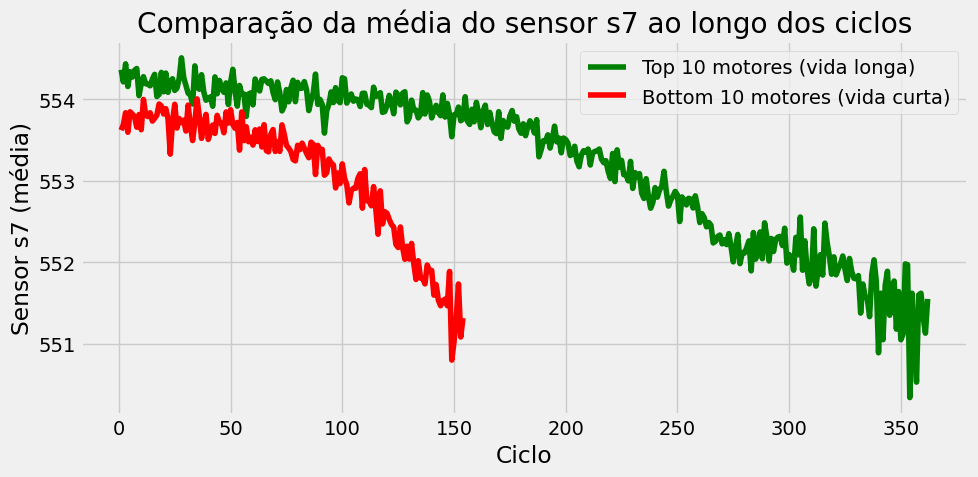

In [21]:
# Definindo top e bottom motores
top_ids = ciclos_finais.sort_values(ascending=False).head(10).index.tolist()
bottom_ids = ciclos_finais.sort_values().head(10).index.tolist()

# Filtrar dados
df_top = df[df['id'].isin(top_ids)]
df_bottom = df[df['id'].isin(bottom_ids)]

# Agrupando por ciclo e tirando média do sensor (ex: s7)
top_media_s7 = df_top.groupby('cycle')['s7'].mean()
bottom_media_s7 = df_bottom.groupby('cycle')['s7'].mean()

plt.figure(figsize=(10, 5))
plt.plot(top_media_s7, label='Top 10 motores (vida longa)', color='green')
plt.plot(bottom_media_s7, label='Bottom 10 motores (vida curta)', color='red')
plt.title("Comparação da média do sensor s7 ao longo dos ciclos")
plt.xlabel("Ciclo")
plt.ylabel("Sensor s7 (média)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Acima percebemos que os valores do sensor caem mais cedo devido ao motor com ciclo de vida menor.**

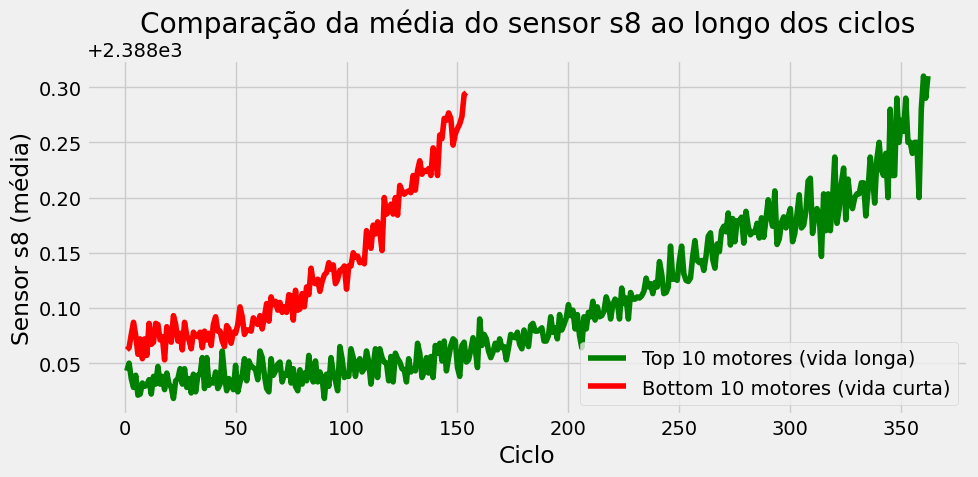

In [22]:
# Definindo top e bottom motores
top_ids = ciclos_finais.sort_values(ascending=False).head(10).index.tolist()
bottom_ids = ciclos_finais.sort_values().head(10).index.tolist()

# Filtrar dados
df_top = df[df['id'].isin(top_ids)]
df_bottom = df[df['id'].isin(bottom_ids)]

# Agrupando por ciclo e tirando média do sensor (ex: s8)
top_media_s8 = df_top.groupby('cycle')['s8'].mean()
bottom_media_s8 = df_bottom.groupby('cycle')['s8'].mean()

plt.figure(figsize=(10, 5))
plt.plot(top_media_s8, label='Top 10 motores (vida longa)', color='green')
plt.plot(bottom_media_s8, label='Bottom 10 motores (vida curta)', color='red')
plt.title("Comparação da média do sensor s8 ao longo dos ciclos")
plt.xlabel("Ciclo")
plt.ylabel("Sensor s8 (média)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Acima percebemos que os motores duráveis operam com s8 baixo por bastante tempo, o que mostra eficiência estável, sem sobrecarga de fluxo. Já os motores fracos apresentam aumento precoce e acelerado no s8, indicando estresse operacional ou vazão anormal precoce. provavelmente é um sensor que representa a taxa de fluxo de combustível.**

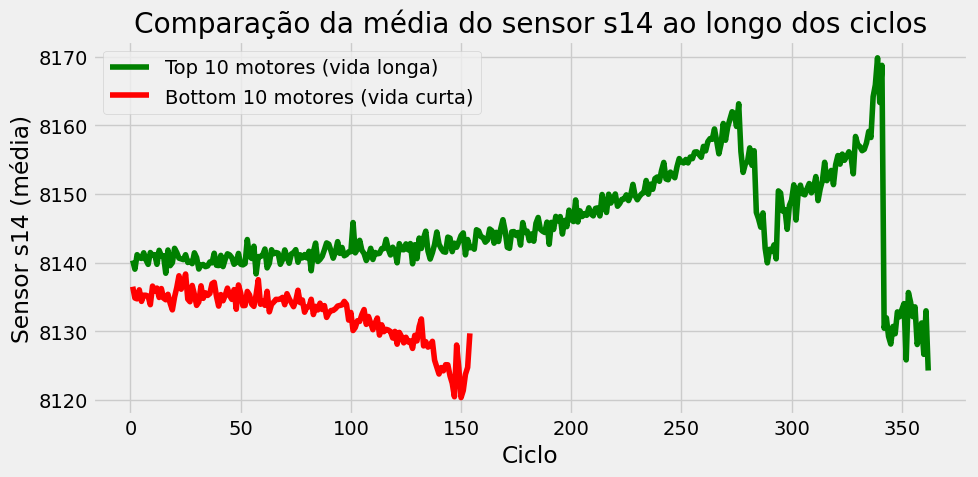

In [23]:
# Definindo top e bottom motores
top_ids = ciclos_finais.sort_values(ascending=False).head(10).index.tolist()
bottom_ids = ciclos_finais.sort_values().head(10).index.tolist()

# Filtrar dados
df_top = df[df['id'].isin(top_ids)]
df_bottom = df[df['id'].isin(bottom_ids)]

# Agrupando por ciclo e tirando média do sensor (ex: s14)
top_media_s14 = df_top.groupby('cycle')['s14'].mean()
bottom_media_s14 = df_bottom.groupby('cycle')['s14'].mean()

plt.figure(figsize=(10, 5))
plt.plot(top_media_s14, label='Top 10 motores (vida longa)', color='green')
plt.plot(bottom_media_s14, label='Bottom 10 motores (vida curta)', color='red')
plt.title("Comparação da média do sensor s14 ao longo dos ciclos")
plt.xlabel("Ciclo")
plt.ylabel("Sensor s14 (média)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Percebemos acima que os motores com maior vida útil começam estáveis (8140), mantem esse nível até aproximadamente o ciclo 200, em seguida apresentam uma curva ascendente gradual e notamos oscilações acentuadas após ciclo 300. Isso pode reprsentar aumento de vibração ou expansão térmica estrutural natural do desgaste, mas de forma lenta e controlada. Os motores que duram menos á começam com valores mais baixos (8135) e apresentam uma queda consistente perto do fim da vida.**

**Agora vamos criar a feature 'cycle_norm' que vai representar o ciclo atual do motor normalizado em relação ao seu ciclo final de vida. Como cada motor no dataset possui uma quantidade diferente de ciclos até a falha, normalizar o tempo de operação para uma escala de 0 a 1 permite ao modelo entender em que estágio da vida útil o motor está, independentemente da sua duração total. Quando 'cycle_norm' = 0, o motor está no início da operação. Quando 'cycle_norm' = 1, o motor está prestes a falhar. Essa normalização torna o modelo mais robusto e generalizável, pois permite identificar padrões de degradação com base no progresso do tempo, e não em valores absolutos de ciclo, que variam de motor para motor.**

In [24]:
# Criando a feature de ciclo normalizado (0 a 1 para cada motor)
df['cycle_norm'] = df['cycle'] / df.groupby('id')['cycle'].transform('max')

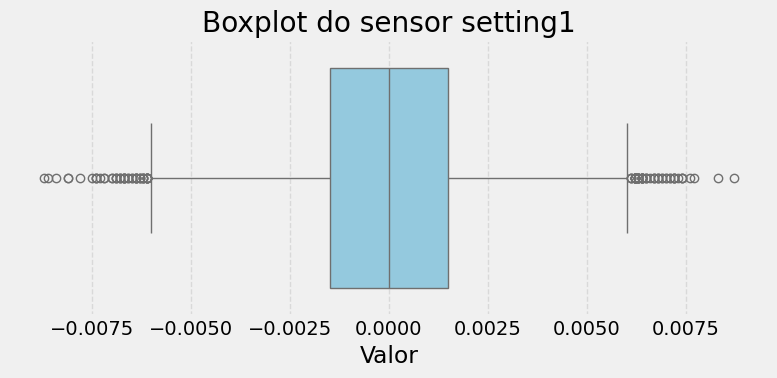

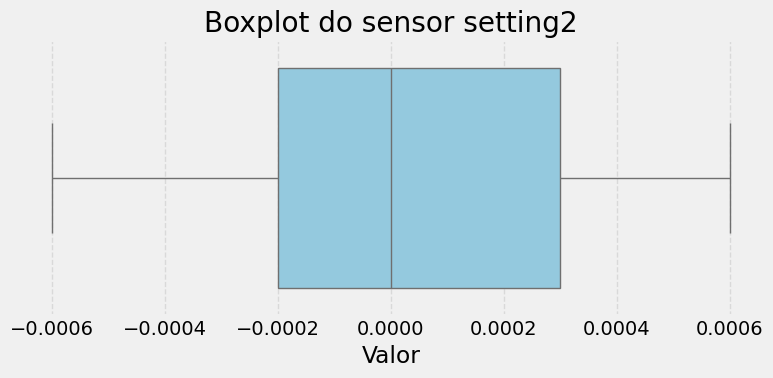

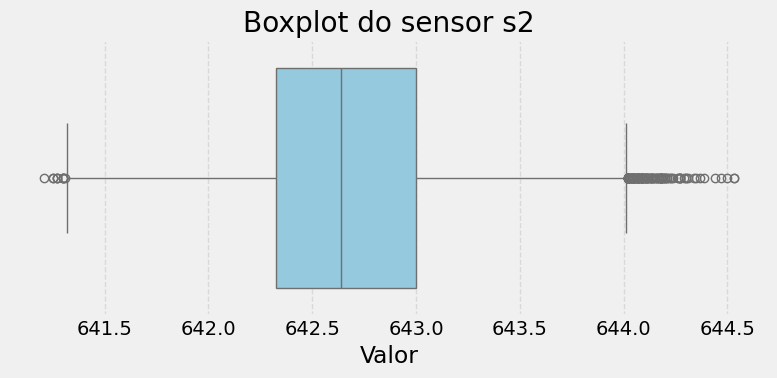

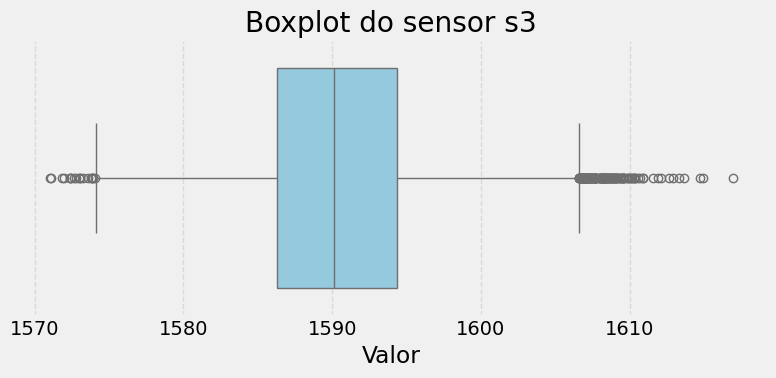

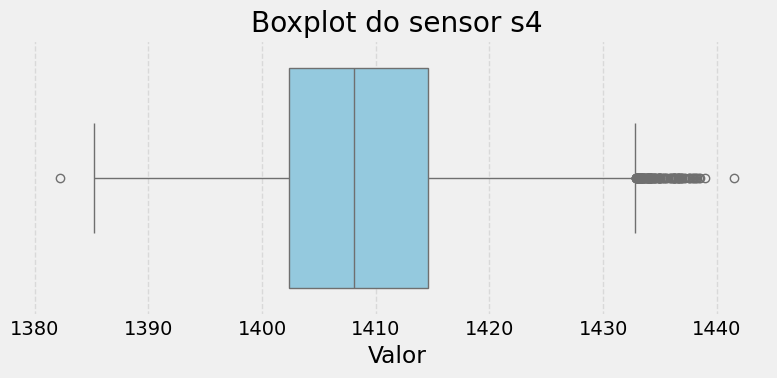

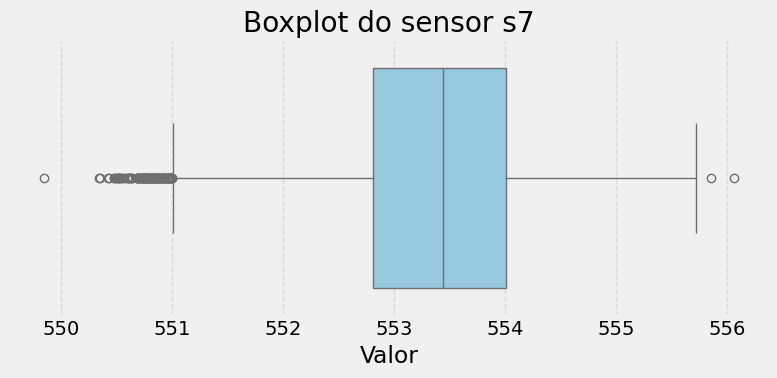

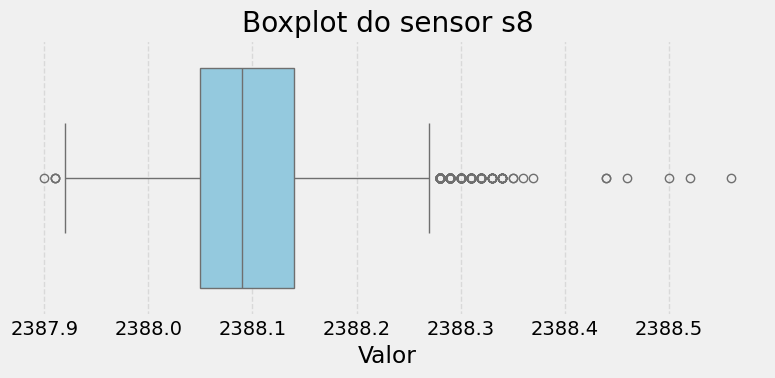

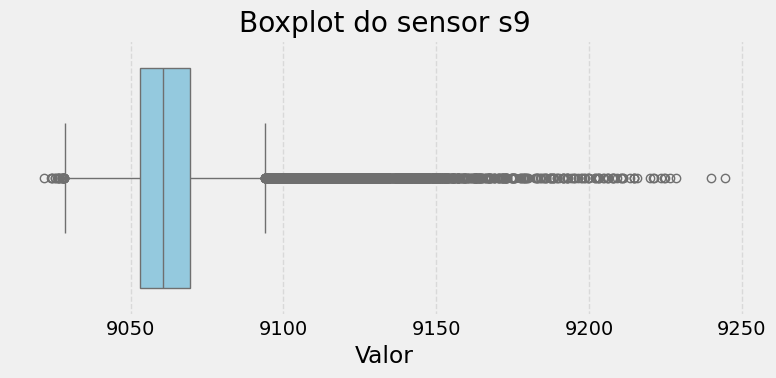

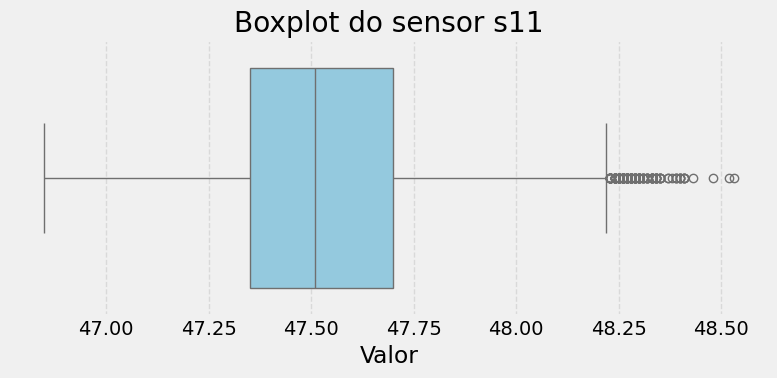

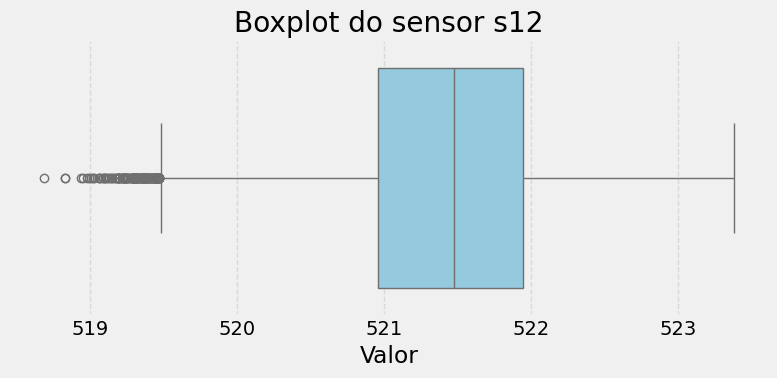

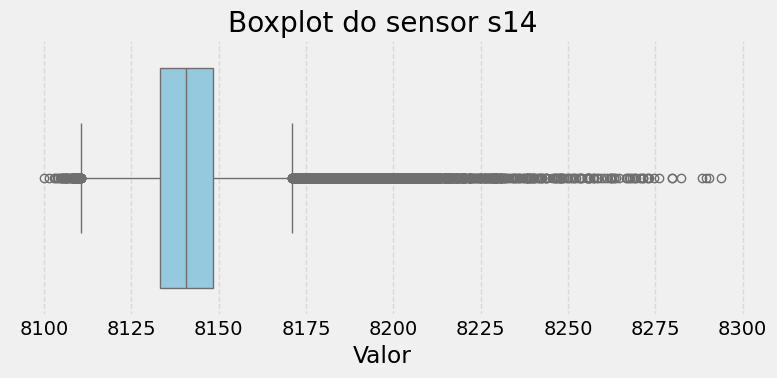

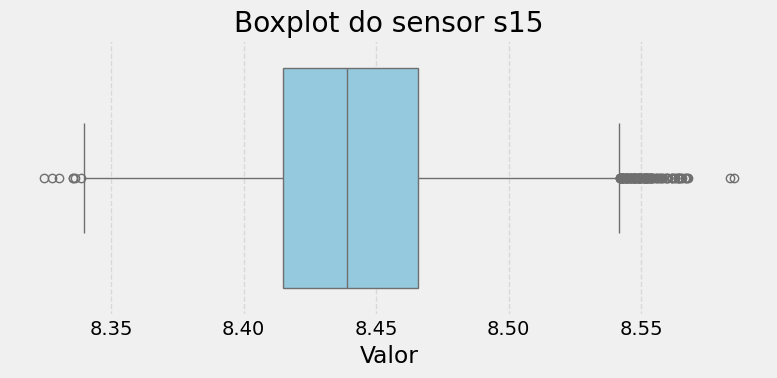

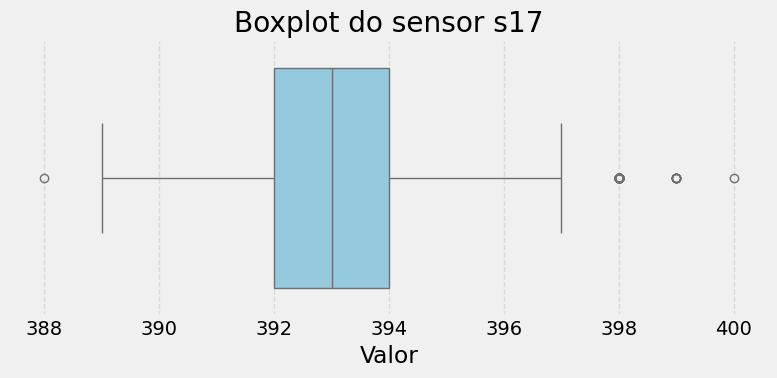

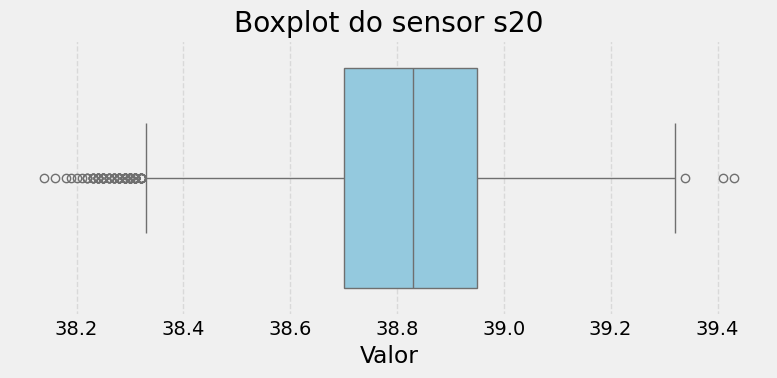

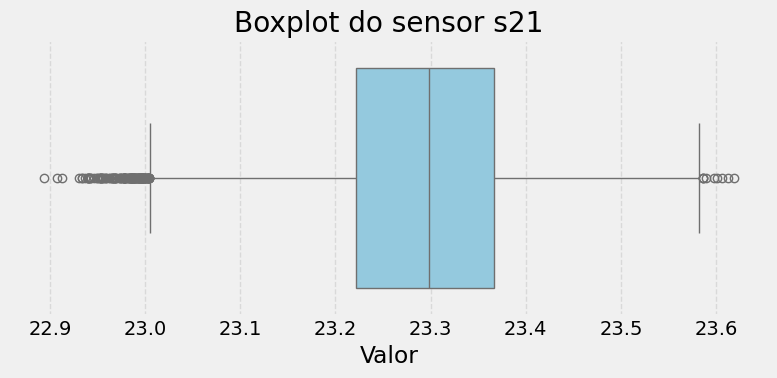

In [25]:
# Lista de colunas de sensores
sensores = [col for col in df.columns if col.startswith('s')]

# Loop para criar boxplot de cada sensor
for sensor in sensores:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[sensor], color='skyblue')
    plt.title(f"Boxplot do sensor {sensor}")
    plt.xlabel("Valor")
    plt.grid(True, axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

In [26]:
def resumo_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    count_outliers = ((df[col] < lim_inf) | (df[col] > lim_sup)).sum()
    return col, count_outliers

# Aplicando em todos os sensores
sensores = [col for col in df.columns if col.startswith('s')]
resumo = [resumo_outliers(df, col) for col in sensores]
resumo = sorted(resumo, key=lambda x: x[1], reverse=True)
for col, n in resumo:
    print(f"{col}: {n} outliers")

s9: 1686 outliers
s14: 1543 outliers
s8: 320 outliers
s11: 167 outliers
s3: 165 outliers
s12: 146 outliers
s21: 136 outliers
s2: 128 outliers
s4: 120 outliers
s15: 120 outliers
s20: 117 outliers
s7: 110 outliers
setting1: 105 outliers
s17: 81 outliers
setting2: 0 outliers


**Percebemos nas informações acima que existem muito outliers, mas todos são dados reais e importantes, pois a medida que os ciclos vão acabando, as falhas aumentam como maior consumo, mais vibrações,, temperatura e pressão fora do padrão, etc.**

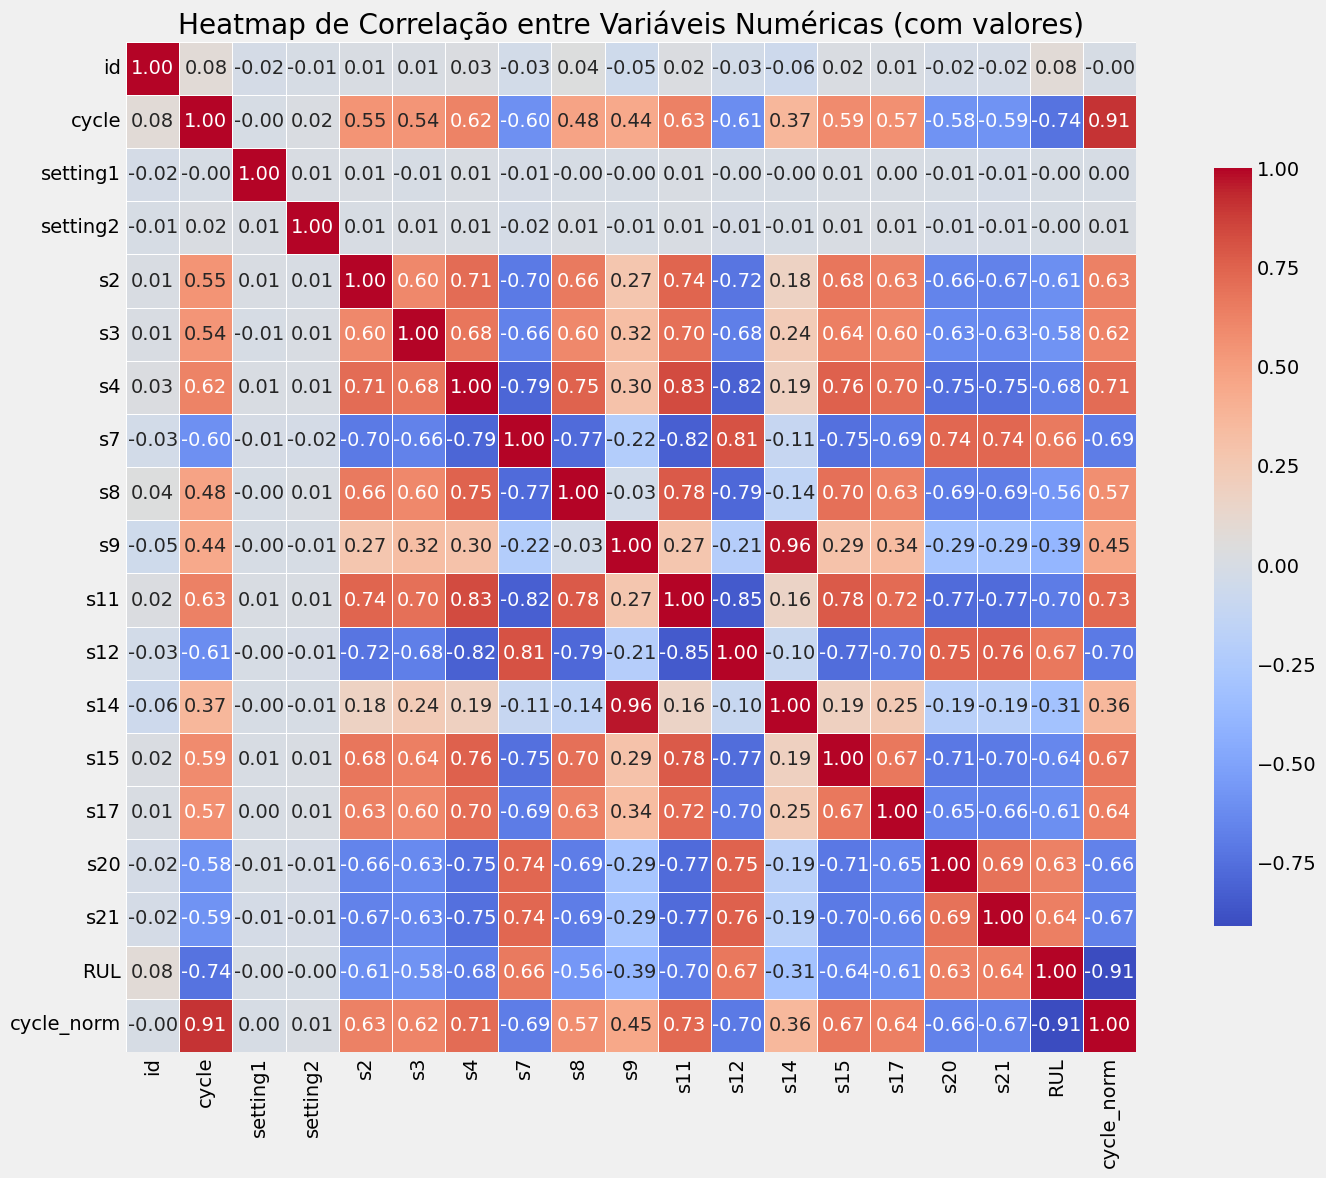

In [27]:
# Selecionando apenas colunas numéricas (sensores, settings, RUL)
numeric_cols = df.select_dtypes(include='number')

# Calculando a matriz de correlação
correlacao = numeric_cols.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(
    correlacao,
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    square=True,
    cbar_kws={'shrink': 0.75}
)
plt.title("Heatmap de Correlação entre Variáveis Numéricas (com valores)")
plt.tight_layout()
plt.show()


**Mesmo com correlação > 0.95 entre s8 e s9, e entre s14 e s15, decidimos manter ambas as variáveis por representarem sensores críticos e complementares no comportamento do motor. Em sistemas de degradação física, variáveis correlacionadas podem capturar estágios diferentes da falha.**

In [28]:
# Salva uma cópia do dataframe original com os IDs e configurações
df_original = df.copy()

In [29]:
df_modelo = df.drop(columns=['id', 'setting1', 'setting2'])

**Nesta etapa, optamos por realizar a divisão dos dados em treino, validação e teste antes da separação entre variáveis independentes (X) e variável alvo (y). Essa abordagem foi escolhida para garantir que a segmentação fosse feita com base nos identificadores únicos de motores (id), respeitando a ordem temporal e a integridade dos ciclos de vida de cada motor. Essa estratégia evita o risco de vazamento de informação temporal, que ocorreria se, por exemplo, ciclos de um mesmo motor fossem distribuídos entre treino e teste. Ao manter cada motor exclusivamente em apenas um dos conjuntos, garantimos que o modelo seja avaliado em motores completamente desconhecidos, simulando um cenário real de manutenção preditiva onde o modelo precisa prever a vida útil de motores que ainda não foram vistos em produção.**

In [30]:
# Pega os motores únicos
motores = df_original['id'].unique()

# Dividindo os IDs (70% treino, 15% val, 15% teste)
train_ids, temp_ids = train_test_split(motores, test_size=0.30, random_state=42)
val_ids, test_ids = train_test_split(temp_ids, test_size=0.50, random_state=42)

# Separando os conjuntos com base nos IDs
df_train = df_modelo[df_original['id'].isin(train_ids)].reset_index(drop=True)
df_val = df_modelo[df_original['id'].isin(val_ids)].reset_index(drop=True)
df_test = df_modelo[df_original['id'].isin(test_ids)].reset_index(drop=True)

print(f"Treino: {df_train.shape}, Validação: {df_val.shape}, Teste: {df_test.shape}")

Treino: (14507, 16), Validação: (3062, 16), Teste: (3062, 16)


In [31]:
# Separar X e y
X_train, y_train = df_train.drop(columns='RUL'), df_train['RUL']
X_val, y_val     = df_val.drop(columns='RUL'), df_val['RUL']
X_test, y_test   = df_test.drop(columns='RUL'), df_test['RUL']

In [32]:
# Padronizando
scaler = StandardScaler()

# Ajustar no treino e transformar nos 3 conjuntos
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

In [33]:
# Criando o validador cruzado por motor
groups = df_original[df_original['id'].isin(train_ids)]['id'].values
gkf = GroupKFold(n_splits=5)

In [34]:
# Instanciando o modelo base
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

In [35]:
# Grid de hiperparâmetros
param_grid = {
    'n_estimators': [100],
    'max_depth': [10,None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [36]:
# Treinando o modelo GridSearch com validação cruzada por grupo (motor)
grid = GridSearchCV(rf, param_grid, cv=gkf, scoring='neg_mean_absolute_error', verbose=2, n_jobs=-1)
grid.fit(X_train_scaled, y_train, groups=groups)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=GroupKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, None], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5], 'n_estimators': [100]},
             scoring='neg_mean_absolute_error', verbose=2)

In [37]:
# Melhor modelo encontrado
best_rf = grid.best_estimator_
print(f"Melhores hiperparâmetros: {grid.best_params_}")

Melhores hiperparâmetros: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [38]:
# Previsões nos conjuntos de validação e teste
val_preds = best_rf.predict(X_val_scaled)
test_preds = best_rf.predict(X_test_scaled)

# Avaliação - Validação
mae_val = mean_absolute_error(y_val, val_preds)
rmse_val = np.sqrt(mean_squared_error(y_val, val_preds))
r2_val = r2_score(y_val, val_preds)
aoc_val = np.sum(np.abs(y_val - val_preds))

print("📊 Avaliação - Validação")
print(f"MAE : {mae_val:.2f}")
print(f"RMSE: {rmse_val:.2f}")
print(f"R²  : {r2_val:.4f}")
print(f"AOC : {aoc_val:.2f}")

# Avaliação - Teste
mae_test = mean_absolute_error(y_test, test_preds)
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))
r2_test = r2_score(y_test, test_preds)
aoc_test = np.sum(np.abs(y_test - test_preds))

print("\n📊 Avaliação - Teste")
print(f"MAE : {mae_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R²  : {r2_test:.4f}")
print(f"AOC : {aoc_test:.2f}")

📊 Avaliação - Validação
MAE : 1.28
RMSE: 2.84
R²  : 0.9981
AOC : 3921.63

📊 Avaliação - Teste
MAE : 1.08
RMSE: 2.60
R²  : 0.9984
AOC : 3311.56


**MAE (Erro médio absoluto):** O modelo erra em média 1.28 ciclos na validação e 1.08 ciclos no teste, o que é extremamente baixo considerando que os motores podem chegar a operar por mais de 250 ciclos. A diferença entre os conjuntos é pequena, o que indica boa generalização e ausência de overfitting.

**RMSE (Raiz do erro quadrático médio):** Como esperado, o RMSE é um pouco maior que o MAE (2.84 na validação e 2.60 no teste), o que indica que o modelo comete poucos erros grandes. Isso reforça que o modelo está bem calibrado, inclusive nos extremos da série.

**R²(Coeficiente de determinação):** O modelo explica 99,81% da variância em validação e 99,84% no teste, o que mostra que ele captura quase totalmente o comportamento dos motores ao longo do tempo. Isso evidencia um forte poder de generalização.

**AOC (Área sobre a Curva de Erro Absoluto):** O AOC foi de 3921.63 na validação e 3311.56 no teste, representando o erro absoluto acumulado. Os valores baixos indicam que o modelo mantém uma precisão consistente ao longo de toda a curva de RUL, sem desvios sistemáticos.

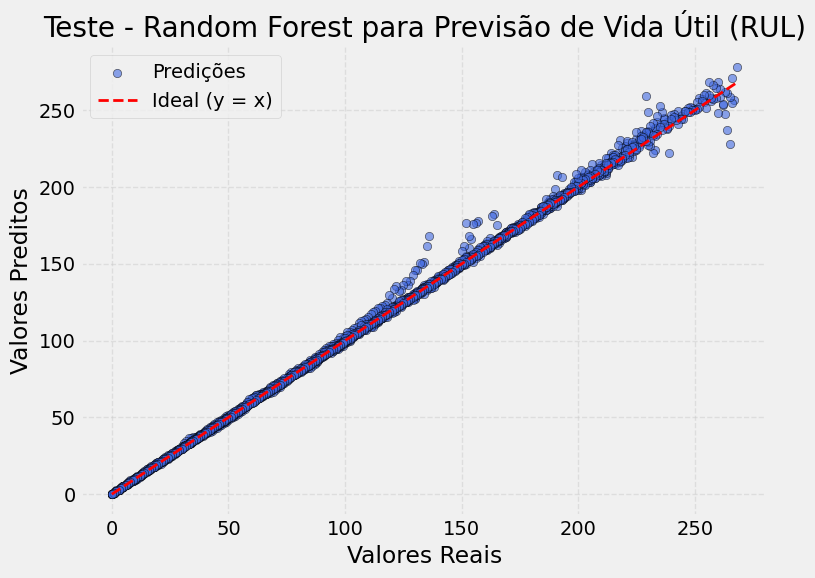

In [39]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, test_preds, alpha=0.6, color='royalblue', edgecolor='k', label='Predições')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label='Ideal (y = x)')
plt.xlabel("Valores Reais")
plt.ylabel("Valores Preditos")
plt.title("Teste - Random Forest para Previsão de Vida Útil (RUL)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

**Acima vemos a alta concentração de pontos azuis ao longo da linha ideal indica que o modelo apresenta elevada precisão preditiva. O alinhamento é consistente em toda a faixa de valores, com pouca dispersão mesmo em motores com RUL elevado. Isso comprova que o modelo consegue generalizar bem e capturar padrões de degradação de forma confiável, mesmo para motores que não foram vistos durante o treinamento.**

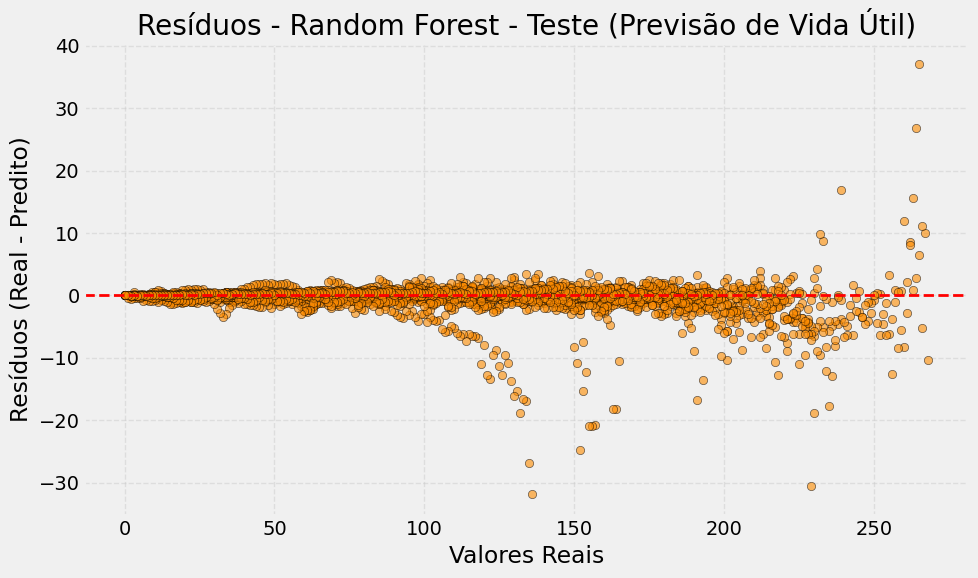

In [40]:
# Calculando os resíduos
residuos_rf = y_test - test_preds

plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuos_rf, color='darkorange', alpha=0.6, edgecolor='k')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Valores Reais")
plt.ylabel("Resíduos (Real - Predito)")
plt.title("Resíduos - Random Forest - Teste (Previsão de Vida Útil)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**O gráfico de resíduos acima mostra a diferença entre os valores reais e preditos pelo modelo Random Forest no conjunto de teste. A maior parte dos resíduos está próxima de zero, o que indica que o modelo está fazendo previsões precisas ao longo de toda a faixa de valores. Os erros são mais concentrados e pequenos nos ciclos finais, o que é essencial para manutenção preditiva, pois essa é a fase mais crítica. Pequenas dispersões nos valores de RUL mais altos são naturais e não indicam falha de generalização, apenas leve variação em motores com vida útil mais longa.**

In [41]:
# Garantir os IDs de teste únicos
ids_teste_unicos = df_original[df_original['id'].isin(test_ids)]['id'].unique()

In [42]:
# Seleciona os 10 motores diferentes manualmente
ids_10_motores = ids_teste_unicos[:10]  # pega os 10 primeiros (você pode mudar aqui)

In [43]:
# Montando o dataframe com todos os ciclos desses motores
df_teste_completo = df_modelo.copy()
df_teste_completo['id'] = df_original['id']
df_teste_completo['cycle'] = df_original['cycle']

df_10_motores = df_teste_completo[df_teste_completo['id'].isin(ids_10_motores)].copy()

In [44]:
# Separando X (mantendo 'cycle' se foi usada no treino)
X_10_motores = df_10_motores.drop(columns=['id', 'RUL'])

In [45]:
# Aplicaando o scaler
X_10_scaled = scaler.transform(X_10_motores)

In [46]:
# Preveendo o RUL
RUL_predito = best_rf.predict(X_10_scaled)

In [47]:
# Montando o dataframe de resultado
df_10_motores_resultado = df_10_motores[['id', 'cycle']].copy()
df_10_motores_resultado['RUL_Preditado'] = RUL_predito.round(2)

In [48]:
# Exibindo a tabela agrupada por motor
for motor_id in ids_10_motores:
    print(f"\nMotor {motor_id}")
    display(df_10_motores_resultado[df_10_motores_resultado['id'] == motor_id].head(5))


Motor 1


,id,cycle,RUL_Preditado
0,1,1,207.74
1,1,2,198.94
2,1,3,189.96
3,1,4,192.44
4,1,5,188.12



Motor 5


,id,cycle,RUL_Preditado
847,5,1,278.40
848,5,2,256.97
849,5,3,254.90
850,5,4,258.50
851,5,5,261.15



Motor 10


,id,cycle,RUL_Preditado
1914,10,1,228.59
1915,10,2,226.63
1916,10,3,225.52
1917,10,4,230.81
1918,10,5,227.61



Motor 11


,id,cycle,RUL_Preditado
2136,11,1,222.16
2137,11,2,237.86
2138,11,3,244.23
2139,11,4,248.99
2140,11,5,252.73



Motor 31


,id,cycle,RUL_Preditado
5987,31,1,224.27
5988,31,2,222.09
5989,31,3,226.82
5990,31,4,248.85
5991,31,5,236.12



Motor 34


,id,cycle,RUL_Preditado
6612,34,1,194.67
6613,34,2,206.54
6614,34,3,193.27
6615,34,4,187.68
6616,34,5,189.54



Motor 40


,id,cycle,RUL_Preditado
7638,40,1,189.69
7639,40,2,192.07
7640,40,3,182.56
7641,40,4,187.30
7642,40,5,184.42



Motor 43


,id,cycle,RUL_Preditado
8238,43,1,214.81
8239,43,2,210.91
8240,43,3,207.67
8241,43,4,209.91
8242,43,5,205.30



Motor 45


,id,cycle,RUL_Preditado
8637,45,1,177.76
8638,45,2,176.86
8639,45,3,175.91
8640,45,4,166.30
8641,45,5,160.54



Motor 70


,id,cycle,RUL_Preditado
13993,70,1,167.85
13994,70,2,161.81
13995,70,3,150.94
13996,70,4,149.67
13997,70,5,150.77


In [49]:
# Filtrando os ciclos com risco de falha iminente
df_alertas = df_10_motores_resultado[df_10_motores_resultado['RUL_Preditado'] < 30].copy()

# Seleciona os 10 motores para visualização clara
motores_destaque = df_10_motores_resultado['id'].unique()[:10]

# Cria subplots com um gráfico por motor
fig = make_subplots(rows=len(motores_destaque), cols=1, shared_xaxes=False,
                    subplot_titles=[f"Motor {mid}" for mid in motores_destaque])

for i, motor_id in enumerate(motores_destaque, start=1):
    dados_motor = df_10_motores_resultado[df_10_motores_resultado['id'] == motor_id]
    dados_alerta = df_alertas[df_alertas['id'] == motor_id]

    # Linha de RUL predito
    fig.add_trace(go.Scatter(
        x=dados_motor['cycle'],
        y=dados_motor['RUL_Preditado'],
        mode='lines+markers',
        name=f'Motor {motor_id}',
        line=dict(color='royalblue', width=2),
        showlegend=False
    ), row=i, col=1)

    # Pontos de alerta
    fig.add_trace(go.Scatter(
        x=dados_alerta['cycle'],
        y=dados_alerta['RUL_Preditado'],
        mode='markers',
        name='Alerta (RUL < 30)',
        marker=dict(color='red', size=10, symbol='x'),
        showlegend=(i == 1)
    ), row=i, col=1)


fig.update_layout(
    height=300 * len(motores_destaque),
    title='Dashboard de Manutenção Preditiva - RUL por Motor',
    xaxis_title='Ciclo',
    yaxis_title='RUL Preditado (ciclos)',
    template='plotly_white',
    legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1)
)

fig.show()


# Adicionando a coluna de alerta
df_10_motores_resultado['Status'] = np.where(df_10_motores_resultado['RUL_Preditado'] < 30, '🔴 Alerta', '✅ OK')

# Ordenar
df_tabela = df_10_motores_resultado.sort_values(['id', 'cycle'])

# Exibindo tabela interativa com destaque
fig_table = go.Figure(data=[go.Table(
    header=dict(values=['<b>ID</b>', '<b>Ciclo</b>', '<b>RUL Preditado</b>', '<b>Status</b>'],
                fill_color='royalblue', align='center', font=dict(color='white', size=12)),
    cells=dict(values=[
        df_tabela['id'],
        df_tabela['cycle'],
        df_tabela['RUL_Preditado'],
        df_tabela['Status']
    ],
        fill_color=[
            ['white']*len(df_tabela),
            ['white']*len(df_tabela),
            ['white']*len(df_tabela),
            np.where(df_tabela['Status'] == '🔴 Alerta', 'mistyrose', 'honeydew')
        ],
        align='center', font=dict(size=11))
)])

fig_table.update_layout(title='Tabela de RUL Preditos por Motor - Destaque para Alertas', height=600)
fig_table.show()


print(df_10_motores_resultado.tail())  # Exibe a tabela final

print(df_tabela.tail(10))  # Exibir no GitHub

       id  cycle  RUL_Preditado    Status
14125  70    133           4.39  🔴 Alerta
14126  70    134           3.36  🔴 Alerta
14127  70    135           2.58  🔴 Alerta
14128  70    136           1.46  🔴 Alerta
14129  70    137           0.00  🔴 Alerta
       id  cycle  RUL_Preditado    Status
14120  70    128           9.91  🔴 Alerta
14121  70    129           8.94  🔴 Alerta
14122  70    130           7.78  🔴 Alerta
14123  70    131           6.82  🔴 Alerta
14124  70    132           5.44  🔴 Alerta
14125  70    133           4.39  🔴 Alerta
14126  70    134           3.36  🔴 Alerta
14127  70    135           2.58  🔴 Alerta
14128  70    136           1.46  🔴 Alerta
14129  70    137           0.00  🔴 Alerta
